In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn import set_config
set_config(transform_output='pandas')

%matplotlib inline
plt.style.use('seaborn-darkgrid')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8)

# Загрузка данных

In [29]:
data = pd.read_excel('data/data_ford_price.xlsx', engine='openpyxl')

#  Отбор признаков: мотивация

## Предобработка данных

In [30]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace=True)

X, y = data.drop(columns='price'), data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

## Обучение модели

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_test_pred)
print('MAE: %.3f' % mae)

MAE: 4682.957


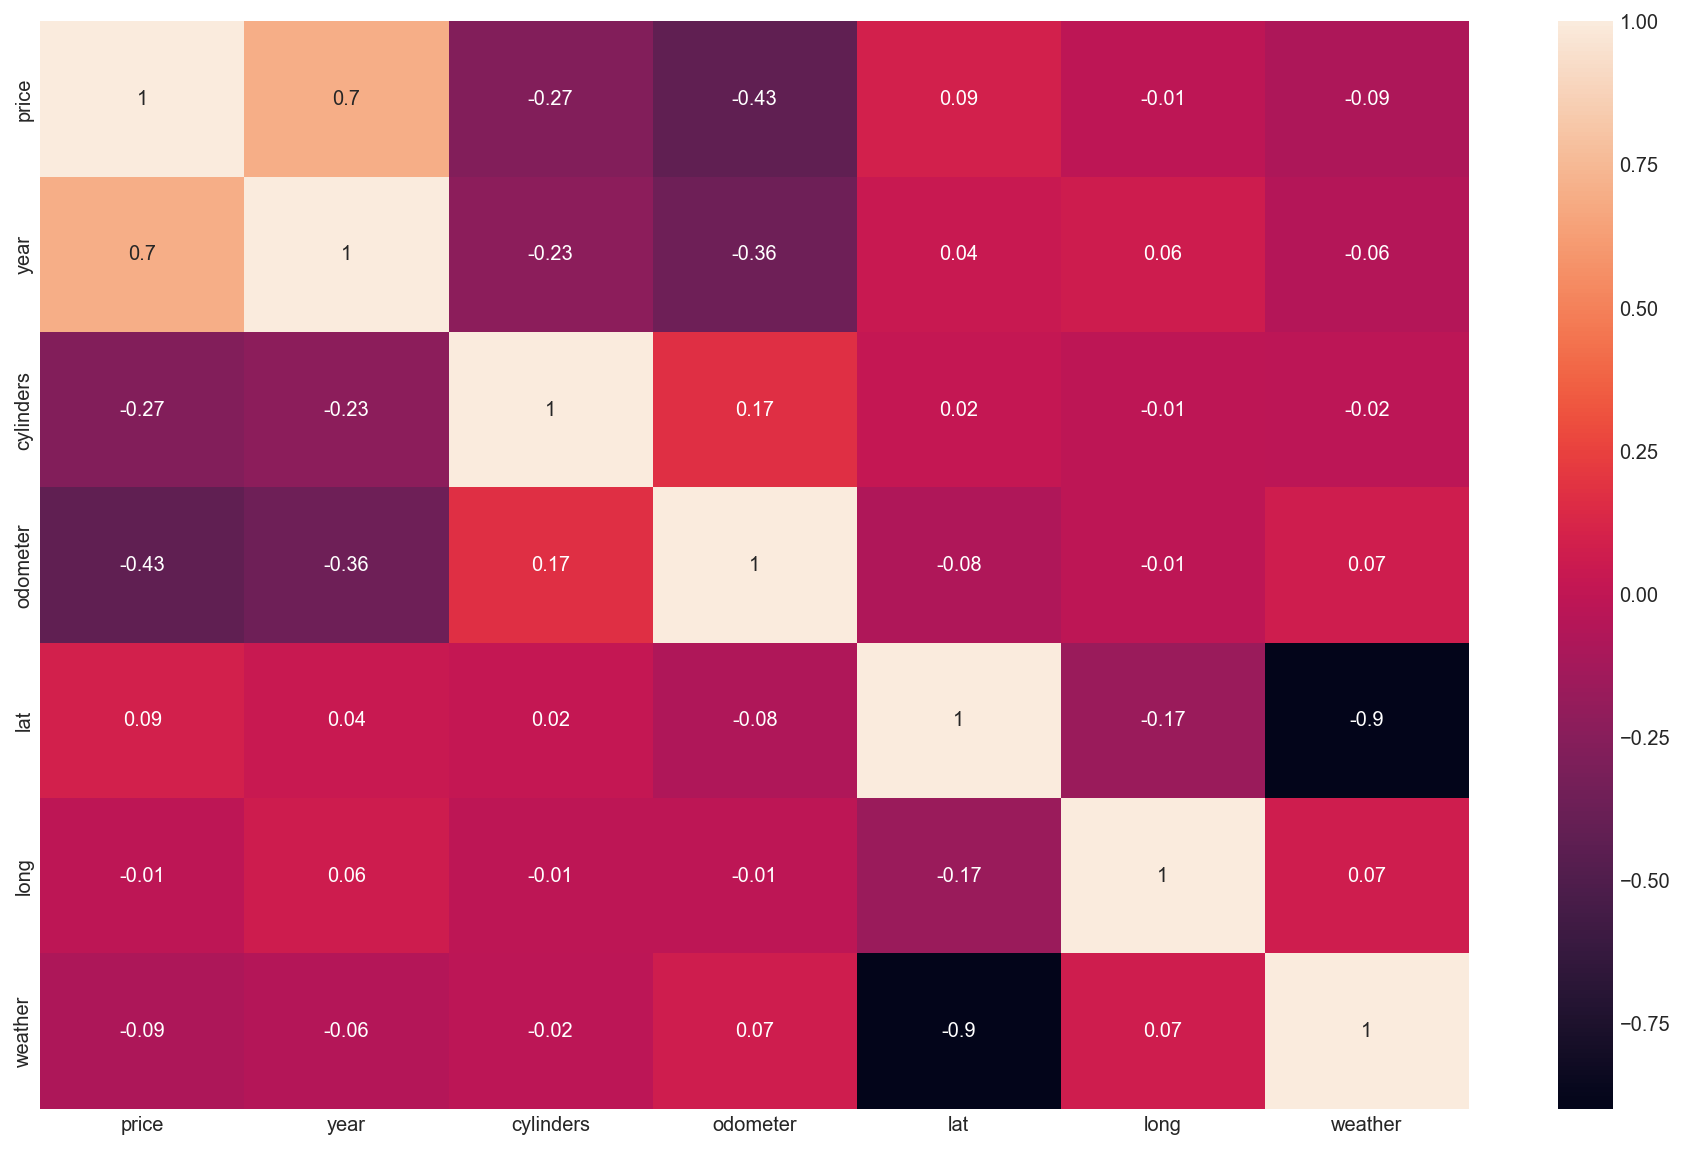

In [32]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(data.corr().round(2), annot=True)
plt.show()

## Удаление избыточного признака

In [33]:
X.drop(columns='lat', inplace=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4672.930


Метрика стала чуть лучше, ошибка уменьшилась.

#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

In [36]:
from sklearn.feature_selection import RFE

In [37]:
X, y = data.drop(columns='price'), data['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [39]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [40]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)

# Отобранные имена столбцов
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

Какой признак RFE счёл наименее значимым? Используйте метод .ranking_ для ранжирования фичей по степени их важности.

In [41]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

Имена столбцов и ранкинг сведу в датафрейм и отфильтрую в обратном порядке

In [42]:
pd.DataFrame({'column': X_train.columns,
              'rank': selector.ranking_}).sort_values(by='rank', ascending=False)

,column,rank
2,odometer,4
4,long,3
5,weather,2
0,year,1
1,cylinders,1
3,lat,1


##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression

In [44]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

На этот раз odometer оказался в топе

### Задание 9.4
Как необходимо дополнить код, чтобы выполнить отбор признаков с помощью ANOVA F-measure?

In [45]:
from sklearn.feature_selection import f_classif

In [46]:
selector = SelectKBest(f_classif, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)